In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [23]:
column_names = ["variance", "skewness", "curtosis", "entropy", "class"]
dataset = pd.read_csv('/content/drive/MyDrive/Final Exam - ML/data_banknote_authentication.txt', header=None, names=column_names, delimiter=',')


X = dataset.drop(columns="class")
y = dataset["class"]

# Initialize the dataset
initial_rows, initial_cols = dataset.shape

# Handling Null Values
null_values_count = dataset.isnull().sum().sum()
if null_values_count > 0:
  print(f"{null_values_count} null values found in the dataset. Handling null values....")
  dataset.dropna(inplace=True)
  print("Null values have been removed.")

# Handling Duplicated Values
duplicates_count = dataset.isnull().sum()
if null_values_count > 0:
  print(f"{null_values_count} duplicates rows found in the dataset. Handling duplicates....")
  dataset.dropna(inplace=True)
  print("Duplicate rows have been removed.")

# Updated dataset
updated_rows, updated_cols = dataset.shape

# Basic Info of Dataset after Cleaning
print("\nDataset Information After Cleaning:")
print(dataset.info())

# Summary Statistics of Dataset after Cleaning
print("\nSummary Statistics After Cleaning:")
print(dataset.describe())


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Summary Statistics After Cleaning:
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.00

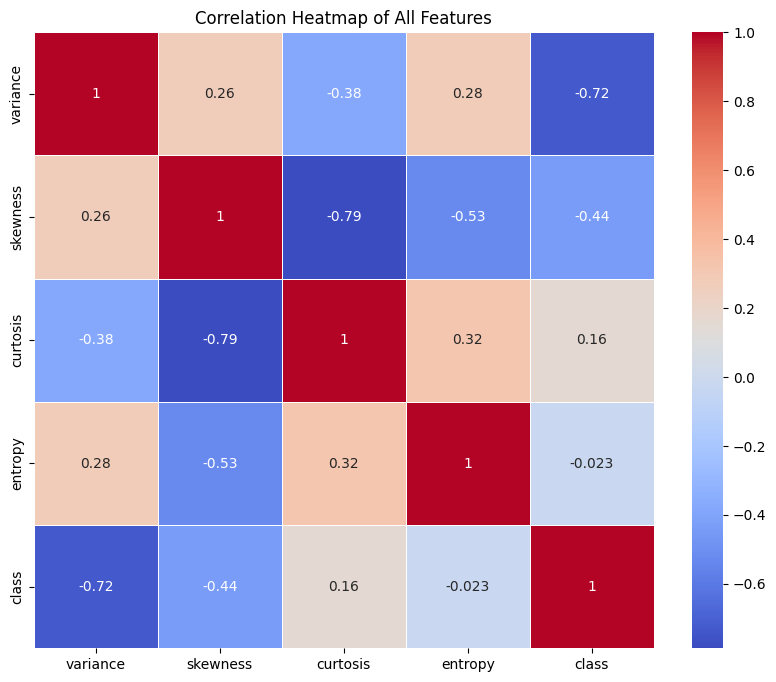

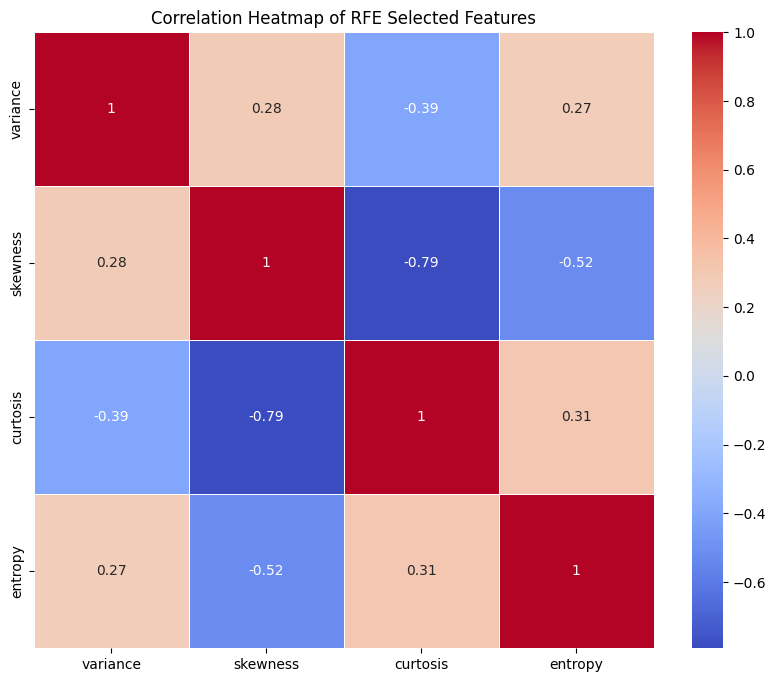

In [ ]:
correlation_matrix_all = dataset.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

rfe.fit(X_train, y_train)

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)


selected_features_indices = [i for i, selected in enumerate(rfe.support_) if selected]
selected_feature_names = X.columns[selected_features_indices]
dataset_selected_features = pd.DataFrame(X_train_selected, columns=selected_feature_names)

correlation_matrix_selected = dataset_selected_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}



In [ ]:
# Cross-validation with all features
results_all_features = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    results_all_features[name] = np.mean(scores)

# Print cross-validation scores before RFE
print("Cross-validation scores with all features:")
for name, score in results_all_features.items():
    print(f"{name}: {score*100:.2f}%")

# Cross-validation with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    scores = cross_val_score(model, X.iloc[:, selected_features_indices], y, cv=10)
    results_rfe_selected_features[name] = np.mean(scores)

# Print cross-validation scores after RFE
print("\nCross-validation scores with RFE-selected features:")
for name, score in results_rfe_selected_features.items():
    print(f"{name}: {score*100:.2f}%")


Cross-validation scores with all features:
Logistic Regression: 98.98%
Decision Tree: 98.54%
Random Forest: 99.34%
Support Vector Machine: 99.64%

Cross-validation scores with RFE-selected features:
Logistic Regression: 98.98%
Decision Tree: 98.54%
Random Forest: 99.34%
Support Vector Machine: 99.64%


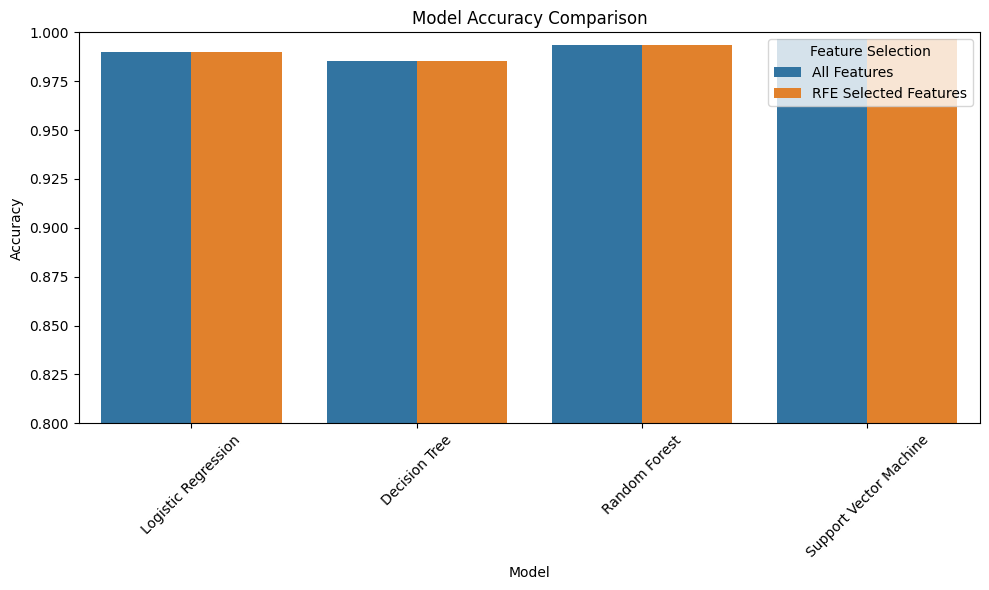

In [ ]:
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()


all_feature_names = dataset.columns[:-1]  # Tanggal ang column ng target
eliminated_features = all_feature_names[~rfe.support_]
selected_features = all_feature_names[rfe.support_]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


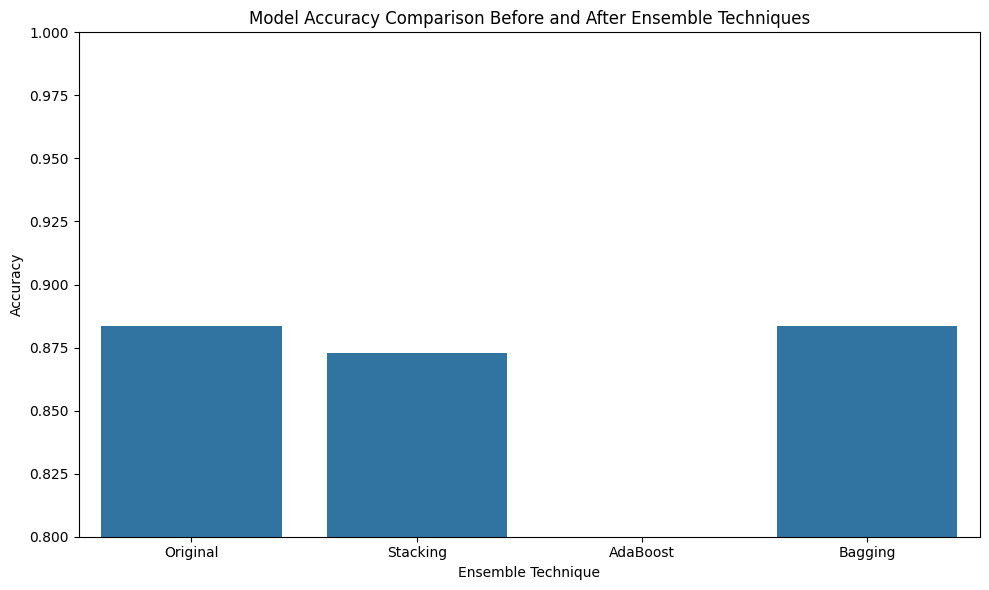

Summary of Model Accuracies:
Original: 0.8836
Stacking: 0.8727
AdaBoost: 0.5382
Bagging: 0.8836


In [22]:
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy


highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]

highest_model.fit(X_train_selected, y_train)
accuracy_highest = highest_model.score(X_test_selected, y_test)

stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_model.fit(X_train_selected, y_train)
stacking_accuracy = stacking_model.score(X_test_selected, y_test)

adaboost_model = AdaBoostClassifier(base_estimator=highest_model, n_estimators=100, algorithm='SAMME')
adaboost_model.fit(X_train_selected, y_train)
adaboost_accuracy = adaboost_model.score(X_test_selected, y_test)

bagging_model = BaggingClassifier(base_estimator=highest_model, n_estimators=100)
bagging_model.fit(X_train_selected, y_train)
bagging_accuracy = bagging_model.score(X_test_selected, y_test)

models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")


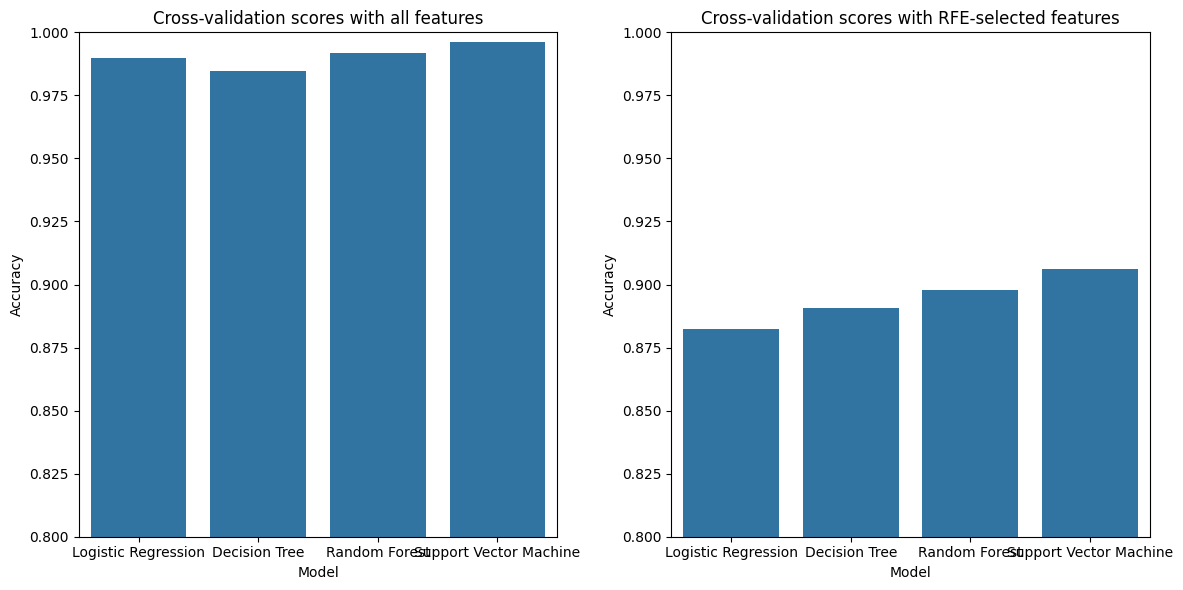

Summary of Cross-validation Model Accuracies with all features:
Logistic Regression: 0.9898
Decision Tree: 0.9847
Random Forest: 0.9920
Support Vector Machine: 0.9964

Summary of Cross-validation Model Accuracies with RFE-selected features:
Logistic Regression: 0.8824
Decision Tree: 0.8906
Random Forest: 0.8979
Support Vector Machine: 0.9061


In [ ]:
# Cross-validation with all features
results_all_features_cv = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    results_all_features_cv[name] = np.mean(scores)

# Cross-validation with RFE-selected features
results_rfe_selected_features_cv = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=10)
    results_rfe_selected_features_cv[name] = np.mean(scores)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(results_all_features_cv.keys()), y=list(results_all_features_cv.values()))
plt.title('Cross-validation scores with all features')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(x=list(results_rfe_selected_features_cv.keys()), y=list(results_rfe_selected_features_cv.values()))
plt.title('Cross-validation scores with RFE-selected features')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

# Print summary of cross-validation scores
print("Summary of Cross-validation Model Accuracies with all features:")
for model, accuracy in results_all_features_cv.items():
    print(f"{model}: {accuracy:.4f}")

print("\nSummary of Cross-validation Model Accuracies with RFE-selected features:")
for model, accuracy in results_rfe_selected_features_cv.items():
    print(f"{model}: {accuracy:.4f}")
